In [1]:
#12/13 16;30  0.01nm download4
import numpy as np
x = []
y = []
x = np.array([5700.0, 5702.4, 5704.799999999999, 5707.199999999999, 5709.5999999999985, 5711.999999999998, 5714.399999999998, 5716.799999999997, 5719.199999999997, 5721.599999999997, 5723.999999999996, 5726.399999999996, 5728.799999999996, 5731.199999999995, 5733.599999999995, 5735.9999999999945, 5738.399999999994, 5740.799999999994, 5743.199999999993, 5745.599999999993, 5747.999999999993, 5750.399999999992, 5752.799999999992, 5755.199999999992, 5757.599999999991])
y = np.array([0.0001875, 0.00051159,0.00030064, 0.00042751, 0.00028251, 0.00042127, 0.00069566, 0.00070879, 0.00095065, 0.00082598, 0.00042533, 0.00569031, 0.03050496, 0.01465547, 0.00294172, 0.00035376, 0.00047846, 0.00043095, 0.00043095, 0.00040657, 0.00022625, 0.000215, 0.00042657, 0.0003725, 0.00038782])
#[0.00038782]
print(x)
print(y)

[5700.  5702.4 5704.8 5707.2 5709.6 5712.  5714.4 5716.8 5719.2 5721.6
 5724.  5726.4 5728.8 5731.2 5733.6 5736.  5738.4 5740.8 5743.2 5745.6
 5748.  5750.4 5752.8 5755.2 5757.6]
[0.0001875  0.00051159 0.00030064 0.00042751 0.00028251 0.00042127
 0.00069566 0.00070879 0.00095065 0.00082598 0.00042533 0.00569031
 0.03050496 0.01465547 0.00294172 0.00035376 0.00047846 0.00043095
 0.00043095 0.00040657 0.00022625 0.000215   0.00042657 0.0003725
 0.00038782]


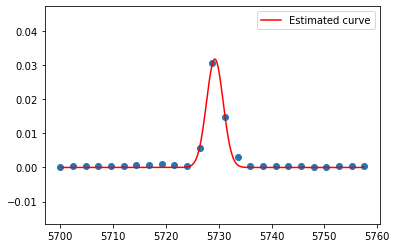

          Estimate  Std. Error         lwCI         upCI
A         0.031748    0.000755     0.030268     0.033229
mu     5729.273057    0.048831  5729.177349  5729.368765
sigma     1.572047    0.043097     1.487579     1.656516


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
 
# gaussian function
def gaussian_func(x, A, mu, sigma):
    return A * np.exp( - (x - mu)**2 / (2 * sigma**2))
 
# generate toy data
#x = np.array([209.0, 209.1, 209.2, 209.3, 209.4, 209.5, 209.6, 209.7, 209.8])
#y = np.array([0.000375, 0.000062, 0.031, 0.039687,  0.039687,  0.034312,  0.021062,  -0.000375, -0.000187])
plt.scatter(x,y)
 
# initial_guess_of_parameters
# この値はソルバーとかで求めましょう．
parameter_initial = np.array([0.045, 5730, 1.3])
 
# estimate optimal parameter & parameter covariance
popt, pcov = curve_fit(gaussian_func, x, y, p0=parameter_initial)
 
# plot result
xd = np.arange(x.min(), x.max(), 0.1)
estimated_curve = gaussian_func(xd, popt[0], popt[1], popt[2])
plt.plot(xd, estimated_curve, label="Estimated curve", color="r")
plt.legend()
plt.savefig("gaussian_fitting.png")
plt.show()
 
# estimate standard Error
StdE = np.sqrt(np.diag(pcov))
 
# estimate 95% confidence interval
alpha=0.025
lwCI = popt + norm.ppf(q=alpha)*StdE
upCI = popt + norm.ppf(q=1-alpha)*StdE
 
# print result
mat = np.vstack((popt,StdE, lwCI, upCI)).T
df=pd.DataFrame(mat,index=("A", "mu", "sigma"),
columns=("Estimate", "Std. Error", "lwCI", "upCI"))
print(df)

In [3]:
#12/13 16;40  0.01nm download5
x = []
y = []
x = np.array([5700.0, 5702.4, 5704.799999999999, 5707.199999999999, 5709.5999999999985, 5711.999999999998, 5714.399999999998, 5716.799999999997, 5719.199999999997, 5721.599999999997, 5723.999999999996, 5726.399999999996, 5728.799999999996, 5731.199999999995, 5733.599999999995, 5735.9999999999945, 5738.399999999994, 5740.799999999994, 5743.199999999993, 5745.599999999993, 5747.999999999993, 5750.399999999992, 5752.799999999992, 5755.199999999992, 5757.599999999991])
y = np.array([0.00039282, 0.00035032, 0.00040907, 0.00054156, 0.00048283, 0.00048283, 0.00071659, 0.00071659, 0.0009441, 0.00118038, 0.00188667, 0.00961712, 0.03563547, 0.00725988, 0.00167289, 0.00097066, 0.00097066, 0.00059471, 0.00059471, 0.00035314, 0.00035314, 0.00027906, 0.00027906, 0.0004125, 0.0004125])
[0.0004125]

[0.0004125]

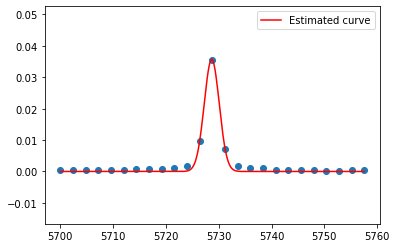

          Estimate  Std. Error         lwCI         upCI
A         0.035722    0.000790     0.034175     0.037270
mu     5728.683826    0.054362  5728.577278  5728.790374
sigma     1.415015    0.034435     1.347524     1.482507


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
 
# gaussian function
def gaussian_func(x, A, mu, sigma):
    return A * np.exp( - (x - mu)**2 / (2 * sigma**2))
 
# generate toy data
#x = np.array([209.0, 209.1, 209.2, 209.3, 209.4, 209.5, 209.6, 209.7, 209.8])
#y = np.array([0.000375, 0.000062, 0.031, 0.039687,  0.039687,  0.034312,  0.021062,  -0.000375, -0.000187])
plt.scatter(x,y)
 
# initial_guess_of_parameters
# この値はソルバーとかで求めましょう．
parameter_initial = np.array([0.045, 5730, 1.3])
 
# estimate optimal parameter & parameter covariance
popt, pcov = curve_fit(gaussian_func, x, y, p0=parameter_initial)
 
# plot result
xd = np.arange(x.min(), x.max(), 0.1)
estimated_curve = gaussian_func(xd, popt[0], popt[1], popt[2])
plt.plot(xd, estimated_curve, label="Estimated curve", color="r")
plt.legend()
plt.savefig("gaussian_fitting.png")
plt.show()
 
# estimate standard Error
StdE = np.sqrt(np.diag(pcov))
 
# estimate 95% confidence interval
alpha=0.025
lwCI = popt + norm.ppf(q=alpha)*StdE
upCI = popt + norm.ppf(q=1-alpha)*StdE
 
# print result
mat = np.vstack((popt,StdE, lwCI, upCI)).T
df=pd.DataFrame(mat,index=("A", "mu", "sigma"),
columns=("Estimate", "Std. Error", "lwCI", "upCI"))
print(df)

In [5]:
#12/13 17;00  0.01nm download6
x = []
y = []
x = np.array([6950.0, 6952.4, 6954.799999999999, 6957.199999999999, 6959.5999999999985, 6961.999999999998, 6964.399999999998, 6966.799999999997, 6969.199999999997, 6971.599999999997, 6973.999999999996, 6976.399999999996, 6978.799999999996, 6981.199999999995, 6983.599999999995, 6985.9999999999945, 6988.399999999994, 6990.799999999994, 6993.199999999993, 6995.599999999993, 6997.999999999993])
y = np.array([0.00058471, 0.00030033, 0.00034376, 0.00037314, 0.00078098, 0.00082254, 0.0009463, 0.0012135, 0.00144914, 0.00123195, 0.00185229, 0.01729296, 0.04662464, 0.01507624, 0.00221577, 0.00044719, 0.00044719, 0.00040813, 0.00033157, 0.00038281, 0.00034094])
[0.00034094]

[0.00034094]

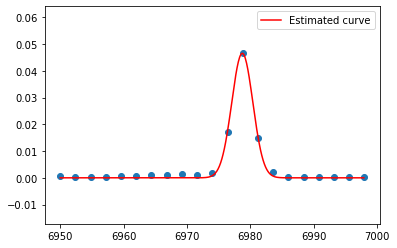

          Estimate  Std. Error         lwCI         upCI
A         0.046553    0.000837     0.044913     0.048193
mu     6978.723911    0.041325  6978.642916  6978.804906
sigma    -1.661153    0.031686    -1.723257    -1.599049


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
 
# gaussian function
def gaussian_func(x, A, mu, sigma):
    return A * np.exp( - (x - mu)**2 / (2 * sigma**2))
 
# generate toy data
#x = np.array([209.0, 209.1, 209.2, 209.3, 209.4, 209.5, 209.6, 209.7, 209.8])
#y = np.array([0.000375, 0.000062, 0.031, 0.039687,  0.039687,  0.034312,  0.021062,  -0.000375, -0.000187])
plt.scatter(x,y)
 
# initial_guess_of_parameters
# この値はソルバーとかで求めましょう．
parameter_initial = np.array([0.045, 6960, 1.3])
 
# estimate optimal parameter & parameter covariance
popt, pcov = curve_fit(gaussian_func, x, y, p0=parameter_initial)
 
# plot result
xd = np.arange(x.min(), x.max(), 0.1)
estimated_curve = gaussian_func(xd, popt[0], popt[1], popt[2])
plt.plot(xd, estimated_curve, label="Estimated curve", color="r")
plt.legend()
plt.savefig("gaussian_fitting.png")
plt.show()
 
# estimate standard Error
StdE = np.sqrt(np.diag(pcov))
 
# estimate 95% confidence interval
alpha=0.025
lwCI = popt + norm.ppf(q=alpha)*StdE
upCI = popt + norm.ppf(q=1-alpha)*StdE
 
# print result
mat = np.vstack((popt,StdE, lwCI, upCI)).T
df=pd.DataFrame(mat,index=("A", "mu", "sigma"),
columns=("Estimate", "Std. Error", "lwCI", "upCI"))
print(df)

In [7]:
#12/13 17;07  0.01nm download7
x = []
y = []
x = np.array([6950.0, 6952.4, 6954.799999999999, 6957.199999999999, 6959.5999999999985, 6961.999999999998, 6964.399999999998, 6966.799999999997, 6969.199999999997, 6971.599999999997, 6973.999999999996, 6976.399999999996, 6978.799999999996, 6981.199999999995, 6983.599999999995, 6985.9999999999945, 6988.399999999994, 6990.799999999994, 6993.199999999993, 6995.599999999993, 6997.999999999993])
y = np.array([0.00046657, 0.00033844, 0.00050002, 0.00064534, 0.00070472, 0.00042313, 0.00077536, 0.00118506, 0.00072409, 0.00053628, 0.00161885, 0.01806639, 0.0450937, 0.01252297, 0.00264768, 0.00065284, 0.00042063, 0.00039438, 0.00036, 0.00033907, 0.00036657])
[0.00036657]

[0.00036657]

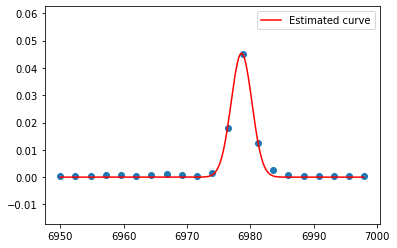

          Estimate  Std. Error         lwCI         upCI
A         0.045314    0.000803     0.043741     0.046887
mu     6978.603488    0.040197  6978.524703  6978.682274
sigma     1.632651    0.031041     1.571812     1.693489


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
 
# gaussian function
def gaussian_func(x, A, mu, sigma):
    return A * np.exp( - (x - mu)**2 / (2 * sigma**2))
 
# generate toy data
#x = np.array([209.0, 209.1, 209.2, 209.3, 209.4, 209.5, 209.6, 209.7, 209.8])
#y = np.array([0.000375, 0.000062, 0.031, 0.039687,  0.039687,  0.034312,  0.021062,  -0.000375, -0.000187])
plt.scatter(x,y)
 
# initial_guess_of_parameters
# この値はソルバーとかで求めましょう．
parameter_initial = np.array([0.045, 6960, 1.3])
 
# estimate optimal parameter & parameter covariance
popt, pcov = curve_fit(gaussian_func, x, y, p0=parameter_initial)
 
# plot result
xd = np.arange(x.min(), x.max(), 0.1)
estimated_curve = gaussian_func(xd, popt[0], popt[1], popt[2])
plt.plot(xd, estimated_curve, label="Estimated curve", color="r")
plt.legend()
plt.savefig("gaussian_fitting.png")
plt.show()
 
# estimate standard Error
StdE = np.sqrt(np.diag(pcov))
 
# estimate 95% confidence interval
alpha=0.025
lwCI = popt + norm.ppf(q=alpha)*StdE
upCI = popt + norm.ppf(q=1-alpha)*StdE
 
# print result
mat = np.vstack((popt,StdE, lwCI, upCI)).T
df=pd.DataFrame(mat,index=("A", "mu", "sigma"),
columns=("Estimate", "Std. Error", "lwCI", "upCI"))
print(df)

235.21039581835703
2695.9481686274958
10078.161487054913


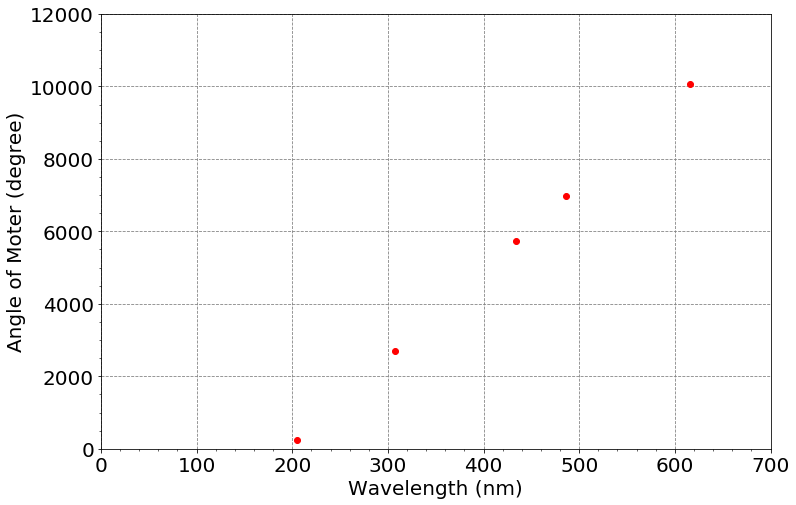

In [4]:
#波長校正
pHc = np.average([5729.273057, 5728.683826])
pHb = np.average([6978.723911, 6978.603488])
wHc = 434.05
wHb = 486.13

omega = 615.3
pTHG = ((pHb - pHc)/(wHb - wHc))*(omega/3 - wHc)+ pHc
pSHG = ((pHb - pHc)/(wHb - wHc))*(omega/2 - wHc)+ pHc
pDYE = ((pHb - pHc)/(wHb - wHc))*(omega - wHc)+ pHc
print(pTHG)
print(pSHG)
print(pDYE)
wavelength = [wHc, wHb, omega, omega/2, omega/3]
degree = [pHc, pHb, pDYE, pSHG, pTHG]

fig = plt.figure(figsize=(12, 8))
plt.plot(wavelength, degree, "ro", color="r",label="value1 of data01" )
#x = np.linspace()
#plt.xticks([0, 400, 800]) #目盛りの追加（データの番号）
plt.xticks(fontsize = 20) #軸目盛変更
plt.yticks(fontsize = 20) #軸目盛変更
#plt.xticks(np.arange(0, 1001, 125), np.arange(0, 80, 10)) #最後が表示されない？
#plt.yscale('log') #対数表示
plt.grid(color = "gray", linestyle="--") #()の中なしでも可
plt.minorticks_on() #補助目盛り
plt.xlim(0, 700)
plt.ylim(0, 12000) #軸の範囲
plt.xlabel("Wavelength (nm)",size = "xx-large", fontsize = 20)
plt.ylabel("Angle of Moter (degree)",size = "xx-large", fontsize = 20)
#plt.legend(loc="upper right") #ラベル位置指定
plt.show()
#plt.savefig("10ns.Harufa-py.jpg") #カレントフォルダに保存

In [34]:
#2021/12/18 14;00 dye laser disenable
x = []
y = []
i = 0
xdegree = np.array([10020.0, 10024.8, 10029.599999999999, 10034.399999999998, 10039.199999999997, 10043.999999999996, 10048.799999999996, 10053.599999999995, 10058.399999999994, 10063.199999999993, 10067.999999999993, 10072.799999999992, 10077.599999999991, 10082.39999999999, 10087.19999999999, 10091.999999999989, 10096.799999999988, 10101.599999999988, 10106.399999999987, 10111.199999999986, 10115.999999999985, 10120.799999999985, 10125.599999999984, 10130.399999999983, 10135.199999999983, 10139.999999999982, 10144.799999999981, 10149.59999999998, 10154.39999999998, 10159.199999999979, 10163.999999999978, 10168.799999999977, 10173.599999999977, 10178.399999999976, 10183.199999999975, 10187.999999999975, 10192.799999999974, 10197.599999999973, 10202.399999999972, 10207.199999999972, 10211.99999999997, 10216.79999999997, 10221.59999999997, 10226.399999999969, 10231.199999999968, 10235.999999999967])

x = ((wHb - wHc)/(pHb - pHc))*(xdegree - pHc) + wHc
print(x)
y = np.array([0.00046066299999999994, 0.00035315199999999997, 0.000379413, 0.0003840925, 0.0003597265, 0.00038503799999999993, 0.00030128949999999995, 0.00043348649999999997, 0.0004366250000000001, 0.0016607550000000003, 0.0018495119999999996, 0.0021016954999999995, 0.0024823094999999996, 0.0033998194999999994, 0.0030923355, 0.0034810855000000003, 0.003353597499999999, 0.0032092455, 0.0031685879999999995, 0.0035529920000000005, 0.0036011239999999994, 0.0033732985, 0.0035026595, 0.0035811149999999997, 0.0035439135, 0.0034873375000000002, 0.003598896, 0.0029892165, 0.0034107719999999994, 0.0035660925, 0.0035858139999999997, 0.0032895635, 0.003602664, 0.0035260765, 0.0032248124999999994, 0.0035045285, 0.0033826584999999995, 0.0028861004999999997, 0.0024492095, 0.0007150914999999999, 0.0005172355000000001, 0.0004731885, 0.0004859935, 0.00046535200000000004, 0.0004219085, 0.00033784649999999994])
#0.00033784649999999994
#for i in range(len(xdegree)):

[612.87614949 613.07618706 613.27622463 613.4762622  613.67629977
 613.87633733 614.0763749  614.27641247 614.47645004 614.67648761
 614.87652518 615.07656274 615.27660031 615.47663788 615.67667545
 615.87671302 616.07675058 616.27678815 616.47682572 616.67686329
 616.87690086 617.07693843 617.27697599 617.47701356 617.67705113
 617.8770887  618.07712627 618.27716383 618.4772014  618.67723897
 618.87727654 619.07731411 619.27735168 619.47738924 619.67742681
 619.87746438 620.07750195 620.27753952 620.47757708 620.67761465
 620.87765222 621.07768979 621.27772736 621.47776493 621.67780249
 621.87784006]


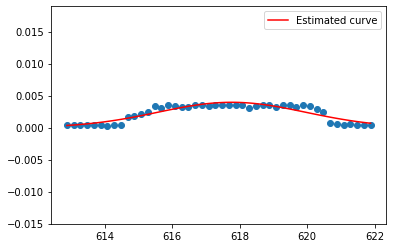

         Estimate  Std. Error        lwCI        upCI
A        0.003950    0.000160    0.003635    0.004264
mu     617.762503    0.102823  617.560972  617.964033
sigma    2.189531    0.109878    1.974175    2.404888


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
 
# gaussian function
def gaussian_func(x, A, mu, sigma):
    return A * np.exp( - (x - mu)**2 / (2 * sigma**2))
 
# generate toy data
#x = np.array([209.0, 209.1, 209.2, 209.3, 209.4, 209.5, 209.6, 209.7, 209.8])
#y = np.array([0.000375, 0.000062, 0.031, 0.039687,  0.039687,  0.034312,  0.021062,  -0.000375, -0.000187])
plt.scatter(x,y)
 
# initial_guess_of_parameters
# この値はソルバーとかで求めましょう．
parameter_initial = np.array([0.04, 615, 1.3])
 
# estimate optimal parameter & parameter covariance
popt, pcov = curve_fit(gaussian_func, x, y, p0=parameter_initial)
 
# plot result
xd = np.arange(x.min(), x.max(), 0.1)
estimated_curve = gaussian_func(xd, popt[0], popt[1], popt[2])
plt.plot(xd, estimated_curve, label="Estimated curve", color="r")
plt.legend()
plt.savefig("gaussian_fitting.png")
plt.show()
 
# estimate standard Error
StdE = np.sqrt(np.diag(pcov))
 
# estimate 95% confidence interval
alpha=0.025
lwCI = popt + norm.ppf(q=alpha)*StdE
upCI = popt + norm.ppf(q=1-alpha)*StdE
 
# print result
mat = np.vstack((popt,StdE, lwCI, upCI)).T
df=pd.DataFrame(mat,index=("A", "mu", "sigma"),
columns=("Estimate", "Std. Error", "lwCI", "upCI"))
print(df)

In [6]:
import numpy as np

pHc = np.average([5729.273057, 5728.683826])
pHb = np.average([6978.723911, 6978.603488])
wHc = 434.05
wHb = 486.13
x = ((wHb - wHc)/(pHb - pHc))*(400 - pHc) + wHc
print(x)

211.96752326703046


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

In [4]:
#2021/12/18 14;00 dye laser disenable
x = []
y = []
i = 0
xdegree = np.array([220.0, 222.8, 225.60000000000002, 228.40000000000003, 231.20000000000005, 234.00000000000006, 236.80000000000007, 239.60000000000008, 242.4000000000001])

x = ((wHb - wHc)/(pHb - pHc))*(xdegree - pHc) + wHc
print(x)
y = np.array([0.025410755000000004, 0.03780480130003199, 0.043256629800896, 0.08631628529856, 0.14786348545216, 0.139733292934336, 0.082238025550464, 0.071325732092608, 0.071325732092608])


[204.46611446 204.58280304 204.69949162 204.8161802  204.93286879
 205.04955737 205.16624595 205.28293453 205.39962311]


C:\Users\fujii\miniconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


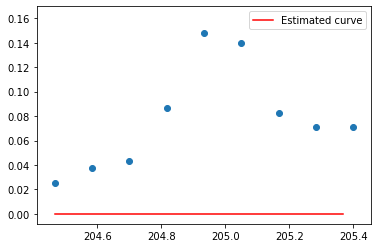

       Estimate  Std. Error  lwCI  upCI
A          0.04         inf  -inf   inf
mu       615.00         inf  -inf   inf
sigma      1.30         inf  -inf   inf


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
 
# gaussian function
def gaussian_func(x, A, mu, sigma):
    return A * np.exp( - (x - mu)**2 / (2 * sigma**2))
 
# generate toy data
#x = np.array([209.0, 209.1, 209.2, 209.3, 209.4, 209.5, 209.6, 209.7, 209.8])
#y = np.array([0.000375, 0.000062, 0.031, 0.039687,  0.039687,  0.034312,  0.021062,  -0.000375, -0.000187])
plt.scatter(x,y)
 
# initial_guess_of_parameters
# この値はソルバーとかで求めましょう．
parameter_initial = np.array([0.04, 615, 1.3])
 
# estimate optimal parameter & parameter covariance
popt, pcov = curve_fit(gaussian_func, x, y, p0=parameter_initial)
 
# plot result
xd = np.arange(x.min(), x.max(), 0.1)
estimated_curve = gaussian_func(xd, popt[0], popt[1], popt[2])
plt.plot(xd, estimated_curve, label="Estimated curve", color="r")
plt.legend()
plt.savefig("gaussian_fitting.png")
plt.show()
 
# estimate standard Error
StdE = np.sqrt(np.diag(pcov))
 
# estimate 95% confidence interval
alpha=0.025
lwCI = popt + norm.ppf(q=alpha)*StdE
upCI = popt + norm.ppf(q=1-alpha)*StdE
 
# print result
mat = np.vstack((popt,StdE, lwCI, upCI)).T
df=pd.DataFrame(mat,index=("A", "mu", "sigma"),
columns=("Estimate", "Std. Error", "lwCI", "upCI"))
print(df)

In [12]:
#2021/12/18 14;00 dye laser disenable
x = []
y = []
i = 0
xdegree = np.array([212.8, 215.60000000000002, 218.40000000000003, 221.20000000000005, 224.00000000000006, 226.80000000000007, 229.60000000000008, 232.4000000000001, 235.2000000000001, 238.0000000000001, 240.80000000000013])

x = ((wHb - wHc)/(pHb - pHc))*(xdegree - pHc) + wHc
print(x)
y = np.array([-0.012135830095040002, -0.012023324408384002, -0.011770239952128001, -0.010593505071680002, -0.011123268422016002, 0.061172697849152004, 0.298951644379008, 0.31231601224051203, 0.317586711650688, 0.03988061457734401, 0.033526400839936])

[204.16605811 204.28274669 204.39943527 204.51612385 204.63281243
 204.74950102 204.8661896  204.98287818 205.09956676 205.21625534
 205.33294392]


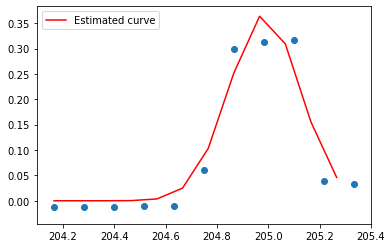

         Estimate  Std. Error        lwCI        upCI
A        0.367209    0.034199    0.300181    0.434237
mu     204.985410    0.014799  204.956404  205.014416
sigma    0.137614    0.014802    0.108602    0.166626


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
 
# gaussian function
def gaussian_func(x, A, mu, sigma):
    return A * np.exp( - (x - mu)**2 / (2 * sigma**2))
 
# generate toy data
#x = np.array([209.0, 209.1, 209.2, 209.3, 209.4, 209.5, 209.6, 209.7, 209.8])
#y = np.array([0.000375, 0.000062, 0.031, 0.039687,  0.039687,  0.034312,  0.021062,  -0.000375, -0.000187])
plt.scatter(x,y)
 
# initial_guess_of_parameters
# この値はソルバーとかで求めましょう．
parameter_initial = np.array([0.04, 205, 0.3])
 
# estimate optimal parameter & parameter covariance
popt, pcov = curve_fit(gaussian_func, x, y, p0=parameter_initial)
 
# plot result
xd = np.arange(x.min(), x.max(), 0.1)
estimated_curve = gaussian_func(xd, popt[0], popt[1], popt[2])
plt.plot(xd, estimated_curve, label="Estimated curve", color="r")
plt.legend()
plt.savefig("gaussian_fitting.png")
plt.show()
 
# estimate standard Error
StdE = np.sqrt(np.diag(pcov))
 
# estimate 95% confidence interval
alpha=0.025
lwCI = popt + norm.ppf(q=alpha)*StdE
upCI = popt + norm.ppf(q=1-alpha)*StdE
 
# print result
mat = np.vstack((popt,StdE, lwCI, upCI)).T
df=pd.DataFrame(mat,index=("A", "mu", "sigma"),
columns=("Estimate", "Std. Error", "lwCI", "upCI"))
print(df)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

In [5]:
#2021/12/18 14;00 dye laser disenable
x = []
y = []
i = 0
xdegree = np.array([210.0, 212.8, 215.60000000000002, 218.40000000000003, 221.20000000000005, 224.00000000000006, 226.80000000000007, 229.60000000000008, 232.4000000000001, 235.2000000000001, 238.0000000000001, 240.80000000000013, 243.60000000000014, 246.40000000000015, 249.20000000000016])

x = ((wHb - wHc)/(pHb - pHc))*(xdegree - pHc) + wHc
print(x)
y = np.array([0.60056081099168, 0.038807131549696, -0.012484252523648001, -0.012704595749504001, -0.011157655841408003, -0.012731222763392001, -0.012348356145792001, 0.085503697383936, 0.39153751255385605, 0.7050486599827201, 0.5167994658164481, 0.11507444991366399, -0.010157253476928002, -0.010157253476928002, -0.010157253476928002])

[204.04936953 204.16605811 204.28274669 204.39943527 204.51612385
 204.63281243 204.74950102 204.8661896  204.98287818 205.09956676
 205.21625534 205.33294392 205.4496325  205.56632109 205.68300967]


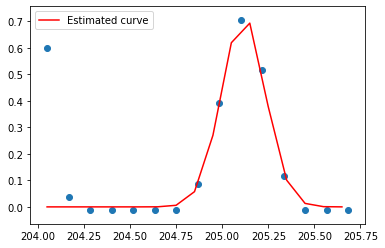

         Estimate  Std. Error        lwCI        upCI
A        0.722733    0.159135    0.410833    1.034632
mu     205.115061    0.030085  205.056096  205.174027
sigma   -0.118046    0.029933   -0.176714   -0.059377


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
 
# gaussian function
def gaussian_func(x, A, mu, sigma):
    return A * np.exp( - (x - mu)**2 / (2 * sigma**2))
 
# generate toy data
#x = np.array([209.0, 209.1, 209.2, 209.3, 209.4, 209.5, 209.6, 209.7, 209.8])
#y = np.array([0.000375, 0.000062, 0.031, 0.039687,  0.039687,  0.034312,  0.021062,  -0.000375, -0.000187])
plt.scatter(x,y)
 
# initial_guess_of_parameters
# この値はソルバーとかで求めましょう．
parameter_initial = np.array([0.04, 205, 0.3])
 
# estimate optimal parameter & parameter covariance
popt, pcov = curve_fit(gaussian_func, x, y, p0=parameter_initial)
 
# plot result
xd = np.arange(x.min(), x.max(), 0.1)
estimated_curve = gaussian_func(xd, popt[0], popt[1], popt[2])
plt.plot(xd, estimated_curve, label="Estimated curve", color="r")
plt.legend()
plt.savefig("gaussian_fitting.png")
plt.show()
 
# estimate standard Error
StdE = np.sqrt(np.diag(pcov))
 
# estimate 95% confidence interval
alpha=0.025
lwCI = popt + norm.ppf(q=alpha)*StdE
upCI = popt + norm.ppf(q=1-alpha)*StdE
 
# print result
mat = np.vstack((popt,StdE, lwCI, upCI)).T
df=pd.DataFrame(mat,index=("A", "mu", "sigma"),
columns=("Estimate", "Std. Error", "lwCI", "upCI"))
print(df)